In [1]:
import tensorflow as tf

# Loading - "MNIST Data Set"
## Containing Training samples = 60,000  , Testing Samples = 10,000
### TensorFlow already contains MNIST data set which can be loaded using Keras

In [2]:
mnist = tf.keras.datasets.mnist## this is basically handwritten characters based on 28x28 sized images from 0 to 9

## After loading the MNIST data, Divide into train and Test datasets

In [3]:
## unpacking the dataset into train and test datasets 
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

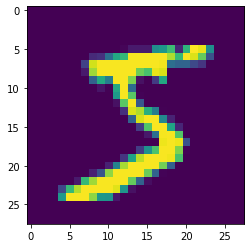

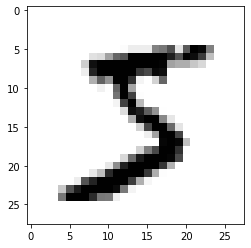

In [5]:
## just check the graph how data looks like
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show() ## in order to execute the graph
## however we dont know if it is color image or binary image
## so inorder to plot it change the configuration
plt.imshow(x_train[0], cmap = plt.cm.binary)

## Checking the values of each pixel
## Before Normalization

In [6]:
print (x_train[0]) ### before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## As images are in Gray level (1 Channel ==> 0 to 255) not Colored(RGB)
# Normalizing the data | Pre Processing Step

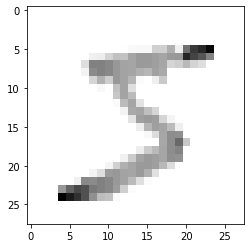

In [7]:
### you might have noticed that , its gray image and all values varies from 0 to 255
### in order to normalize it
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

## After normalization

In [8]:
print(x_train[0]) ## you can see all values are now normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
print (y_train[0]) ### just to check that we have lables inside out nertwork

5


# Resizing image to make it suitable for apply Convolution operation

In [10]:
import numpy as np
IMG_SIZE=28
x_trainr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE,1) ###increasing one dimension for kernel operation
x_testr= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE,1) ###increasing one dimension for kernel operation
print ("Training Samples dimension",x_trainr.shape)
print ("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


# Creating a Deep Neural Network
# Training on 60,000 samples of MNIST handwritten dataset

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
### Creating a neural network now
model = Sequential()

##### First Convolution Layer 0 1 2 3 (60000,28,28,1)
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ### only for first convolution layer to mention input layer size
model.add(Activation("relu"))## activation function to make it non-linear, <0, rmeove, >0
model.add(MaxPooling2D(pool_size=(2,2)))## MAxpooling single maximum value of 2x2,

##### 2nd Convolution Layer
model.add(Conv2D(64, (3,3))) ## 2nd convolution layer
model.add(Activation("relu"))## activation function 
model.add(MaxPooling2D(pool_size=(2,2)))## MAxpooling

##### 3rd Convolution layer
model.add(Conv2D(64, (3,3))) # 24*24
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

##### Fully Connected Layer #1 20x20=400
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

##### Fully Connected Layer # 2
model.add(Dense(32))
model.add(Activation("relu"))

#### Last Fully Connected Layer , output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) ## this last dense layer must be equal to 10
model.add(Activation('softmax'))### activation function is changed to softmax (Class probabilities)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
print ("Total Training Samples = ",len(x_trainr))

Total Training Samples =  60000


In [15]:
model.compile(loss ="sparse_categorical_crossentropy", optimizer ="adam", metrics=['accuracy'])

In [16]:
model.fit(x_trainr,y_train,epochs=5,batch_size = 1, validation_split = 0.3) ## Training my model

Epoch 1/5
42000/42000 [==============================] - 160s 4ms/step - loss: 0.2393 - accuracy: 0.9273 - val_loss: 0.1572 - val_accuracy: 0.9593
Epoch 2/5
42000/42000 [==============================] - 156s 4ms/step - loss: 0.1173 - accuracy: 0.9690 - val_loss: 0.1104 - val_accuracy: 0.9699
Epoch 3/5
42000/42000 [==============================] - 139s 3ms/step - loss: 0.1038 - accuracy: 0.9729 - val_loss: 0.0953 - val_accuracy: 0.9757
Epoch 4/5
42000/42000 [==============================] - 165s 4ms/step - loss: 0.1008 - accuracy: 0.9755 - val_loss: 0.1057 - val_accuracy: 0.9704
Epoch 5/5
42000/42000 [==============================] - 156s 4ms/step - loss: 0.0996 - accuracy: 0.9753 - val_loss: 0.1085 - val_accuracy: 0.9745


In [17]:
### Evaluatering on testing data set MNIT
test_loss, test_acc = model.evaluate(x_testr, y_test,batch_size = 1)
print ("Test Loss on 10.000 test samples",test_loss )
print ("Validation Accuarcy 0n 10,000 test samples",test_acc )


10000/10000 [==============================] - 16s 2ms/step - loss: 0.0907 - accuracy: 0.9770
Test Loss on 10.000 test samples 0.09068082273006439
Validation Accuarcy 0n 10,000 test samples 0.9769999980926514


In [18]:
predictions = model.predict([x_testr])

In [19]:
print (predictions)

[[1.7929207e-12 1.5237234e-06 2.9355431e-05 ... 9.9987149e-01
  4.9884995e-11 2.2347196e-07]
 [3.0972364e-19 6.3058379e-16 1.0000000e+00 ... 4.3475903e-11
  4.7261134e-10 1.3741163e-21]
 [9.1323954e-34 1.0000000e+00 4.5649840e-27 ... 1.4809902e-24
  6.2804637e-31 5.0476329e-30]
 ...
 [7.3297418e-36 2.9861518e-17 3.9152089e-14 ... 2.3283038e-12
  9.6217490e-16 1.1888505e-19]
 [8.1590514e-08 6.2258168e-14 9.1257011e-12 ... 5.1242351e-11
  6.0400457e-06 1.6354310e-06]
 [8.7506403e-18 1.7086656e-16 2.3834095e-19 ... 5.3501455e-23
  8.1545295e-19 3.3029402e-22]]


In [20]:
print (np.argmax(predictions[0]))

7


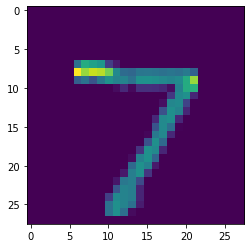

In [21]:
plt.imshow(x_test[0])

In [22]:
print (np.argmax(predictions[128]))

8


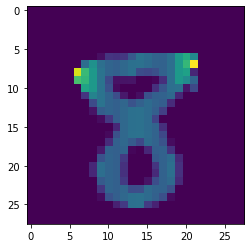

In [23]:
plt.imshow(x_test[128])

In [24]:
import cv2

In [312]:
img = plt.imread("C:/Users/arbu8/Desktop/mp1/one.png")

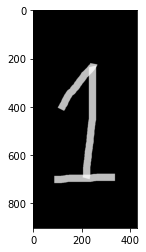

In [313]:
plt.imshow(img)

In [314]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [315]:
gray.shape

(903, 430)

In [316]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [317]:
resized.shape

(28, 28)

In [318]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [319]:

newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [320]:
newimg.shape

(1, 28, 28, 1)

In [321]:
predictions=model.predict(newimg)

In [322]:
print(np.argmax(predictions))

1


In [323]:
img = plt.imread("C:/Users/arbu8/Desktop/mp1/two.png")

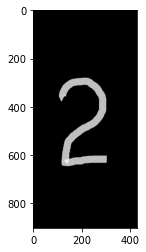

In [324]:
plt.imshow(img)

In [325]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [326]:
gray.shape

(903, 430)

In [327]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [328]:
resized.shape

(28, 28)

In [329]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [330]:
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)


In [331]:
newimg.shape

(1, 28, 28, 1)

In [332]:
predictions=model.predict(newimg)

In [333]:
print(np.argmax(predictions))

2


In [334]:
img = plt.imread("C:/Users/arbu8/Desktop/mp1/three.png")

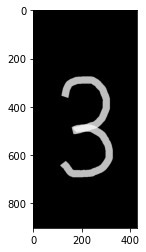

In [335]:
plt.imshow(img)

In [336]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [337]:
gray.shape

(903, 430)

In [338]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [339]:
resized.shape

(28, 28)

In [340]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [341]:
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [342]:
newimg.shape

(1, 28, 28, 1)

In [343]:
predictions=model.predict(newimg)

In [344]:
print(np.argmax(predictions))

3


In [345]:
img = plt.imread("C:/Users/arbu8/Desktop/mp1/four.png")

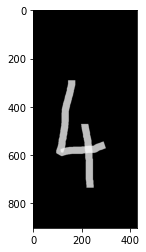

In [346]:
plt.imshow(img)

In [347]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [348]:
gray.shape

(903, 430)

In [349]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [350]:
resized.shape

(28, 28)

In [351]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [352]:
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [353]:
newimg.shape

(1, 28, 28, 1)

In [354]:
predictions=model.predict(newimg)

In [355]:
print(np.argmax(predictions))

4


In [356]:
 img = plt.imread("C:/Users/arbu8/Desktop/mp1/five.png")

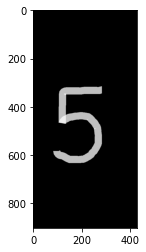

In [357]:
plt.imshow(img)

In [358]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [359]:
gray.shape

(903, 430)

In [360]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [361]:
resized.shape

(28, 28)

In [362]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [363]:
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [364]:
newimg.shape

(1, 28, 28, 1)

In [365]:
predictions=model.predict(newimg)

In [366]:
print(np.argmax(predictions))

5


In [370]:
img = plt.imread("C:/Users/arbu8/Desktop/mp1/seven.png")

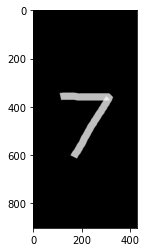

In [371]:
plt.imshow(img)

In [372]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [373]:
gray.shape

(903, 430)

In [374]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [375]:
resized.shape

(28, 28)

In [376]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [377]:
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)


In [378]:
newimg.shape

(1, 28, 28, 1)

In [379]:
predictions=model.predict(newimg)

In [380]:
print(np.argmax(predictions))

7


In [425]:
img = plt.imread("C:/Users/arbu8/Desktop/mp1/eight.png")

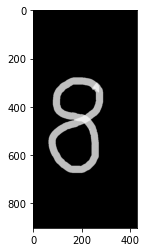

In [426]:
plt.imshow(img)

In [427]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [428]:
gray.shape

(903, 430)

In [429]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)


In [430]:
resized.shape

(28, 28)

In [431]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [432]:
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [433]:
newimg.shape

(1, 28, 28, 1)

In [434]:
predictions=model.predict(newimg)

In [435]:
print(np.argmax(predictions))

9


In [403]:
img = plt.imread("C:/Users/arbu8/Desktop/mp1/nine.png")

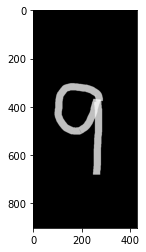

In [404]:
plt.imshow(img)

In [405]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [406]:
gray.shape

(903, 430)

In [407]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [408]:
resized.shape

(28, 28)

In [409]:
newimg=tf.keras.utils.normalize(resized,axis=1) ##0 to 1 scaling

In [410]:
newimg=np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [411]:
newimg.shape

(1, 28, 28, 1)

In [412]:
predictions=model.predict(newimg)

In [413]:
print(np.argmax(predictions))

9
